In [1]:
import gzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data loading

In [2]:
with gzip.open('../data/wiki-RfA.txt.gz', 'rt', encoding='utf-8') as f:
    blocks = f.read().strip().split('\n\n')  # Assuming each record is separated by a blank line

data = []

# Parse each block of text into a dictionary
for block in blocks:
    record = {}
    for line in block.split('\n'):
        if line:
            key, value = line.split(':', 1)  # Split on the first colon only
            record[key.strip()] = value.strip()
    data.append(record)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

#Rename the columns
df.columns = ['source', 'target', 'vote', 'result', 'year_election', 'date_vote', 'comment']

In [3]:
df

,source,target,vote,result,year_election,date_vote,comment
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.
198272,Jiang,WhisperToMe,1,1,2003,,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....


## 2. Preliminary checks

### 2.1 Check the date and time of votes : 

In [4]:
# Define a function to extract date components
def extract_date_components(date_str):
    try:
        # Split the date string by the comma and space to separate time and date parts
        time_part, date_part = date_str.split(', ')
        # Split the time part by the colon to separate hours and minutes
        hour, minute = time_part.split(':')
        # Split the date part by space to separate day, month, and year
        day, month, year = date_part.split(' ')
        
        return pd.Series({
            "hour": hour,
            "minute": minute,
            "day": day,
            "month": month,
            "year_vote": year
        })
    except ValueError:
        # If there is a ValueError, return None for each component
        return pd.Series({
            "hour": None,
            "minute": None,
            "day": None,
            "month": None,
            "year_vote": None
        })

# Apply the function to each row in the 'date' column
date_components = df['date_vote'].apply(extract_date_components)

# Concatenate the new DataFrame with the original one (if needed)
new_df = pd.concat([df, date_components], axis=1)

new_df

,source,target,vote,result,year_election,date_vote,comment,hour,minute,day,month,year_vote
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,23,13,19,April,2013
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,01,04,20,April,2013
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,23,43,19,April,2013
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...,00,11,20,April,2013
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit...",00,56,20,April,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,02,51,2,Sep,2003
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,23,45,26,Nov,2003
198272,Jiang,WhisperToMe,1,1,2003,,Support. --,None,None,None,None,None
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....,05,38,5,Dec,2003


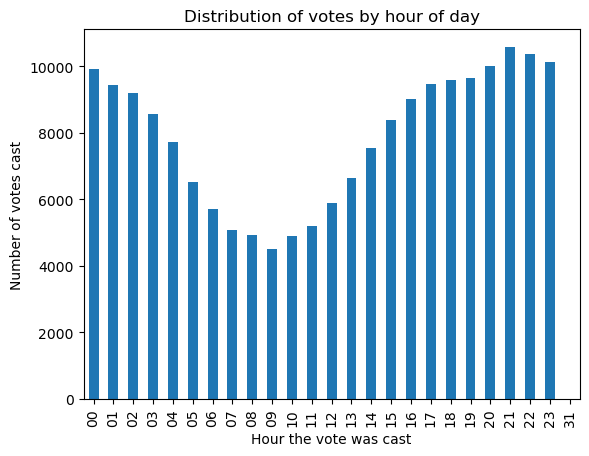

In [5]:
#Look at the distribution for the values of the hour with histogram
new_df['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour the vote was cast')
plt.ylabel('Number of votes cast')
plt.title('Distribution of votes by hour of day')
plt.show()

We can see here that we have a voting date where the vote took place at the hour 31. 

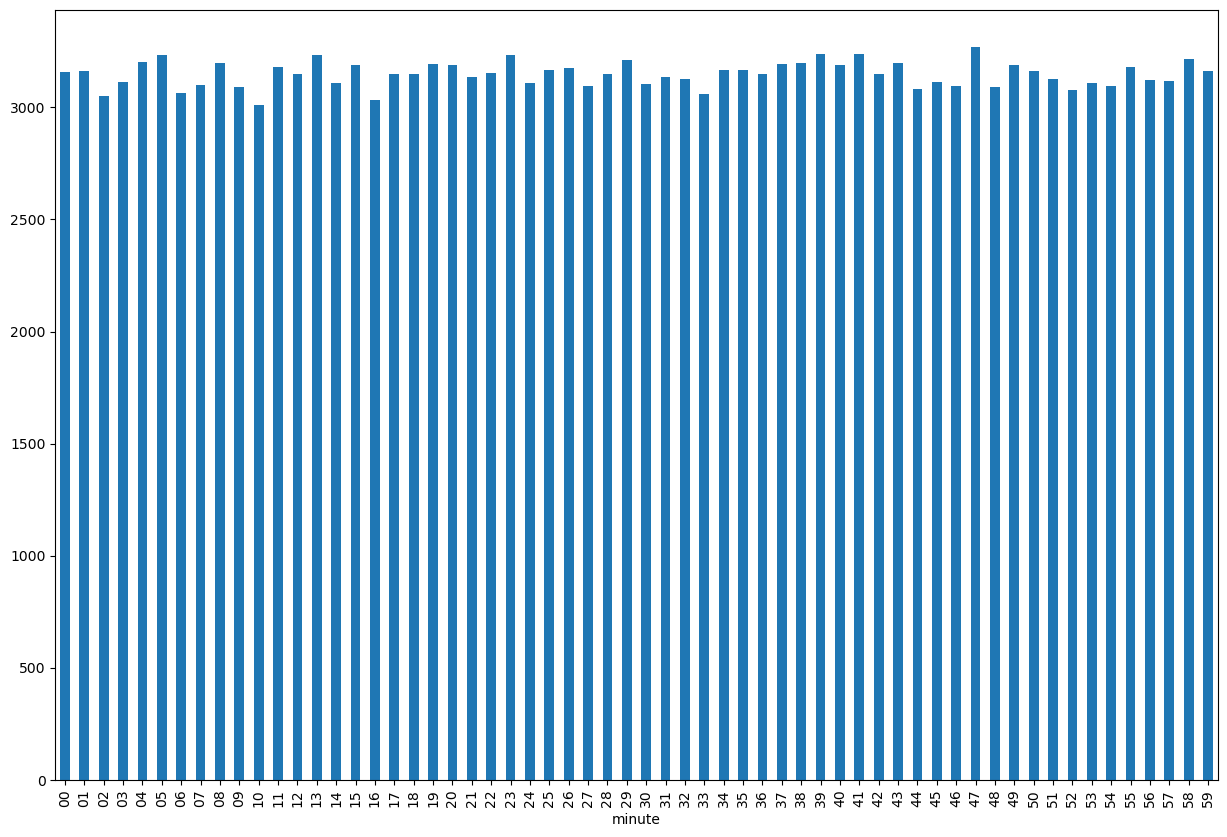

In [6]:
#Set the date to empty for the row where the hour is 31
new_df.loc[new_df['hour'] == '31', 'hour'] = ''
new_df[new_df['hour'] == '31']

#Plot the distribution of the values for the minutes with histogram
new_df['minute'].value_counts().sort_index().plot(kind='bar' , figsize=(15,10))
plt.show()


All the values for the minutes look to be fine and the distribution is uniform as expected.

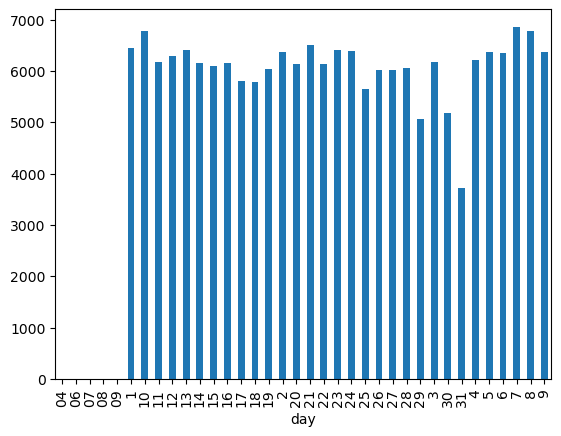

In [7]:
#Look at the distribution of the values for the days with histogram and order the values
new_df['day'].value_counts().sort_index().plot(kind='bar')
plt.show()

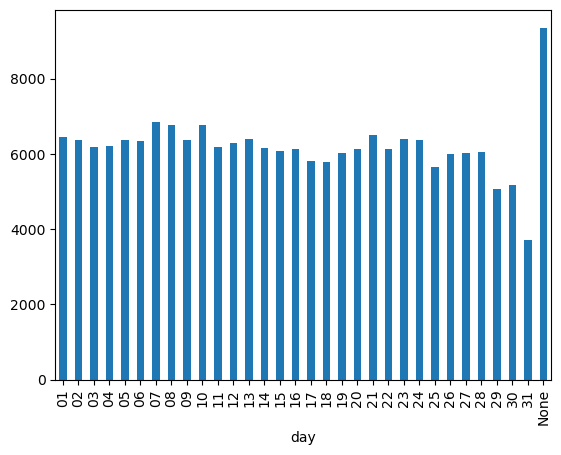

In [8]:
#We merge the same digits (preceded by a zero or not)
new_df['day'] = new_df['day'].astype(str).str.zfill(2)

new_df['day'].value_counts().sort_index().plot(kind='bar')
plt.show()

All values for the day look also to be ok 

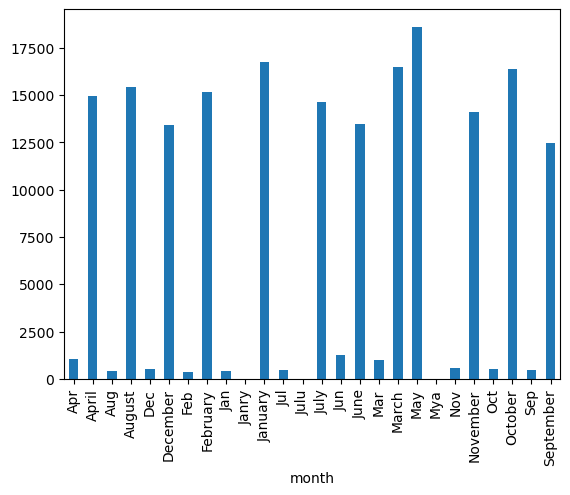

In [9]:
#Look at the distribution of the values for the months with histogram and order the values
new_df['month'].value_counts().sort_index().plot(kind='bar')
plt.show()

We can see that for specific months different values appear in the dataset. For example, for July we have Jul, Julu, July ; for the October we have Oct, October. 

In [10]:
#Map the values of the months to the full name of the month
month_map = { 
    "Apr" : "April",
    "April" : "April",
    "Aug" : "August",
    "August" : "August",
    "Dec" : "December",
    "December" : "December",
    "Feb" : "February",
    "February" : "February",
    "Jan" : "January",
    "Janry" : "January",
    "January" : "January",
    "Jul" : "July",
    "Julu" : "July",
    "July" : "July",
    "Jun" : "June",
    "June" : "June",
    "Mar" : "March",
    "March" : "March",
    "May" : "May",
    "Mya" : "May",
    "Nov" : "November",
    "November" : "November",
    "Oct" : "October",
    "October" : "October",
    "Sep" : "September",
    "September" : "September"
}

def correction_month (month) : 
    return month_map.get(month, month)

new_df['month'] = new_df['month'].apply(correction_month)
new_df

,source,target,vote,result,year_election,date_vote,comment,hour,minute,day,month,year_vote
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,23,13,19,April,2013
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,01,04,20,April,2013
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,23,43,19,April,2013
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...,00,11,20,April,2013
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit...",00,56,20,April,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support,02,51,02,September,2003
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.,23,45,26,November,2003
198272,Jiang,WhisperToMe,1,1,2003,,Support. --,None,None,None,None,None
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....,05,38,05,December,2003


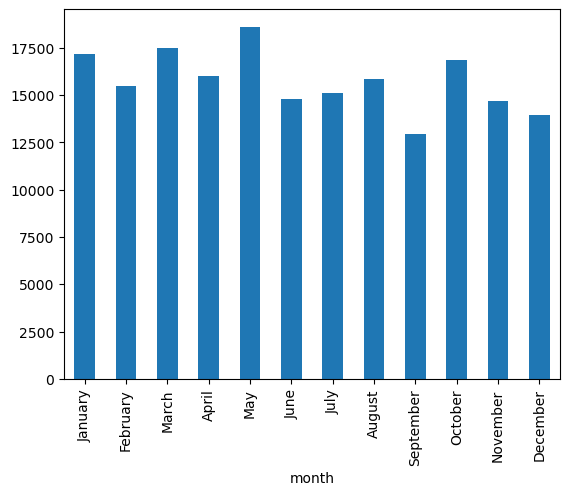

In [11]:
#Display the corrected dataframe
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
new_df['month'] = pd.Categorical(new_df['month'], categories=month_order, ordered=True)

new_df['month'].value_counts().sort_index().plot(kind='bar')
plt.show()

<Axes: xlabel='year_vote'>

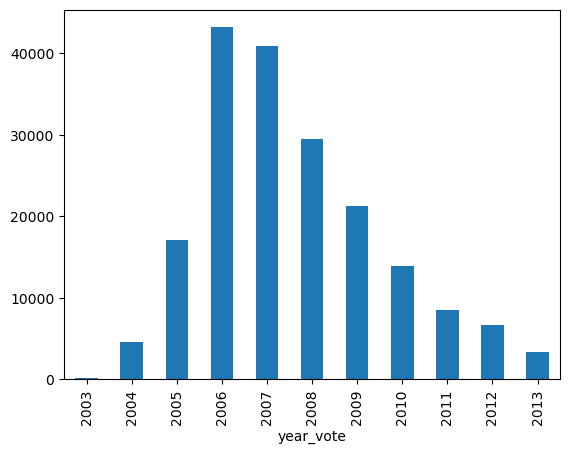

In [12]:
#Look at the distribution of the number of votes per years
new_df['year_vote'].value_counts().sort_index().plot(kind='bar')

The values for the years seems also to be ok. 

In [13]:
new_df['date_vote'] = pd.to_datetime(new_df['day'].astype(str) + ' ' +
                            new_df['month'].astype(str) + ' ' +
                            new_df['year_vote'].astype(str) + ' ' +
                            new_df['hour'].astype(str) + ':' +
                            new_df['minute'].astype(str),
                            format='%d %B %Y %H:%M' , errors = 'coerce')

new_df.drop(['hour', 'minute', 'day', 'month', 'year_vote'], axis=1, inplace=True)
new_df

,source,target,vote,result,year_election,date_vote,comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


In [14]:
#Look at the number of missing dates of votes
non_date_votes = new_df['date_vote'].isnull().sum()
total_count = new_df['target'].count()
print(f'The number of votes for which the date is missing or incorrect is {non_date_votes}')
print(f'This represents {(non_date_votes/total_count)*100:.2f}% of the data.')

The number of votes for which the date is missing or incorrect is 9368
This represents 4.72% of the data.


### 2.2 Dive into user name source

In [15]:
#Transform the source column to string
new_df['source'] = new_df['source'].astype(str)

In [16]:
#Look at the number of unique source users
unique_voters = new_df['source'].nunique()
print(f'The number of unique voters is {unique_voters}')

#Look at the number of null values for the source
nan_source = new_df[new_df.source == '']['source'].count()
print(f'The number of voters without tags is {nan_source}')

The number of unique voters is 10417
The number of voters without tags is 1661


In [17]:
new_df = new_df[new_df.source != '']

<Axes: ylabel='Frequency'>

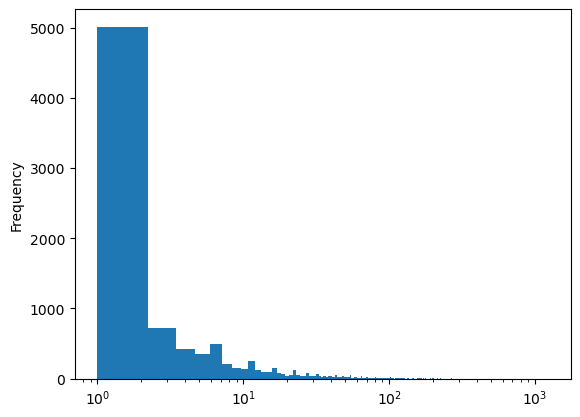

In [18]:
new_df.groupby('source').source.count().plot(kind='hist', bins=1000, logx=True)

In [19]:
perc_uniq = (new_df.groupby('source').source.count() == 1).sum() / new_df.groupby('source').source.count().count()

print(f"{perc_uniq * 100:.2f}% of the voters have only voted once.")

36.42% of the voters have only voted once.


### 2.3 Dive into target user name 

In [21]:
#Look at the number of unique source users
unique_electives = new_df['target'].nunique()
print(f'The number of unique users running for election is {unique_electives}')

#Look at the number of null values for the source
nan_target = new_df[new_df.target == '']['target'].count()
print(f'The number of nan values for the source is {nan_target}')

The number of unique users running for election is 3491
The number of nan values for the source is 0


### 2.4 Dive into the year_election values

count     196614
unique        11
top         2006
freq       44525
Name: year_election, dtype: object


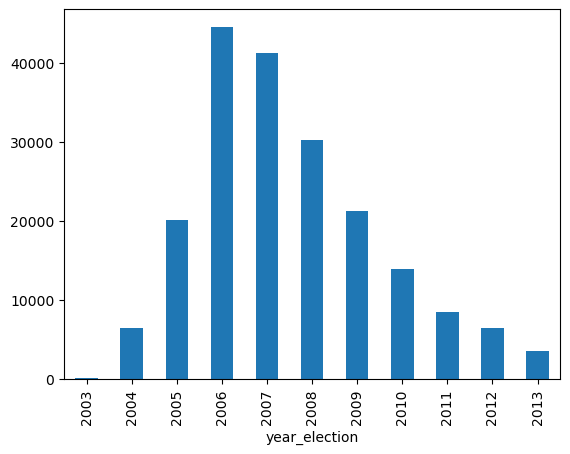

In [22]:
#Look at the distribution of the values for year_election
print(new_df['year_election'].describe())
new_df['year_election'].value_counts().sort_index().plot(kind='bar')
plt.show()

### 2.5 Dive into the vote and results values


count     196614
unique         3
top            1
freq      143879
Name: vote, dtype: object


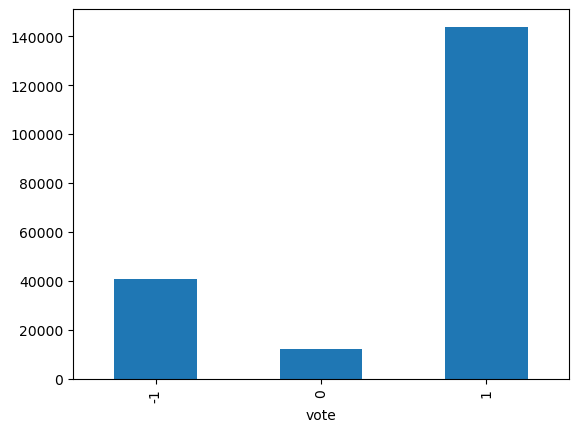

In [23]:
#Look at the distribution of the values for the vote
print(new_df['vote'].describe())
new_df['vote'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [24]:
value_perc_vote = new_df['vote'].value_counts(normalize=True) * 100

# Print the percentages
print("Percentage of Each Unique Value in vote:")
print(value_perc_vote)

Percentage of Each Unique Value in vote:
vote
1     73.178410
-1    20.683675
0      6.137915
Name: proportion, dtype: float64


count     196614
unique         2
top            1
freq      122524
Name: result, dtype: object


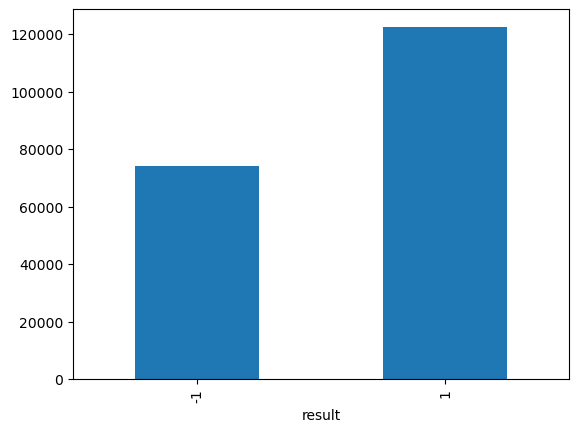

In [25]:
#Look at the distribution of the values for the result
print(new_df['result'].describe())
new_df['result'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [26]:
value_perc_result = new_df['result'].value_counts(normalize=True) * 100

# Print the percentages
print("Percentage of Each Unique Value in result:")
print(value_perc_result)

Percentage of Each Unique Value in result:
result
1     62.317027
-1    37.682973
Name: proportion, dtype: float64


## 3. Voting results analysis

In [27]:
cleaned_df = new_df.copy(deep=True)

cleaned_df['vote'] = cleaned_df['vote'].astype(int)
cleaned_df['result'] = cleaned_df['result'].astype(int)
cleaned_df['year_election'] = cleaned_df['year_election'].astype(int)

In [28]:
cleaned_df['year_election'].unique()

array([2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

In [29]:
#We know that 

In [30]:
#We compute here different statistics
multiple_elections = cleaned_df.groupby(['target' , 'result']).apply(lambda x : pd.Series({
    'number_of_votes' : len(x['source']), 
    'ratio_positive_votes' : x[x.vote == 1]['vote'].sum() / len(x.source), 
    'average_comment_length' : x['comment'].str.len().mean(),
    'election_year' : x['year_election'].value_counts().idxmax()
})).reset_index()

<Axes: xlabel='result', ylabel='ratio_positive_votes'>

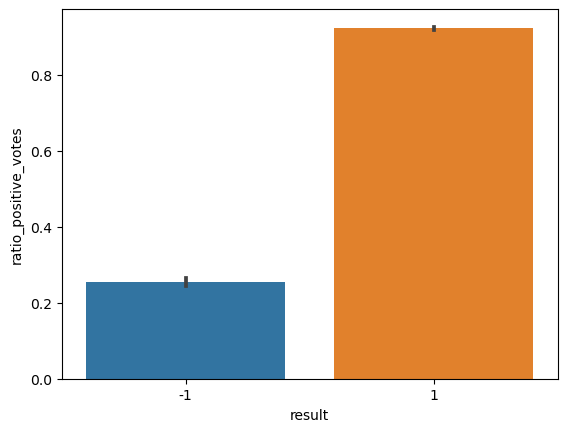

In [31]:
sns.barplot( x= 'result' , y = 'ratio_positive_votes' , data = multiple_elections)

/Users/robinjaccard/opt/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


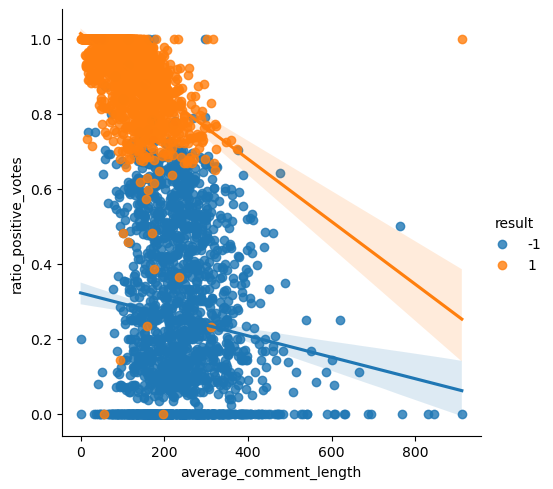

In [32]:
sns.lmplot(x = 'average_comment_length' , y = 'ratio_positive_votes' , data = multiple_elections , hue = 'result')

In [33]:
#Compute the correlation between the outcome of the vote and the ratio of positive votes
multiple_elections['result'].corr(multiple_elections['ratio_positive_votes'])

#Compute the correlation between the outcome of the vote and the average length of the comment
multiple_elections['result'].corr(multiple_elections['average_comment_length'])


-0.615878234971494

## 4. Number of votes analysis

In [34]:
multiple_elections['election_year'].unique().sort()

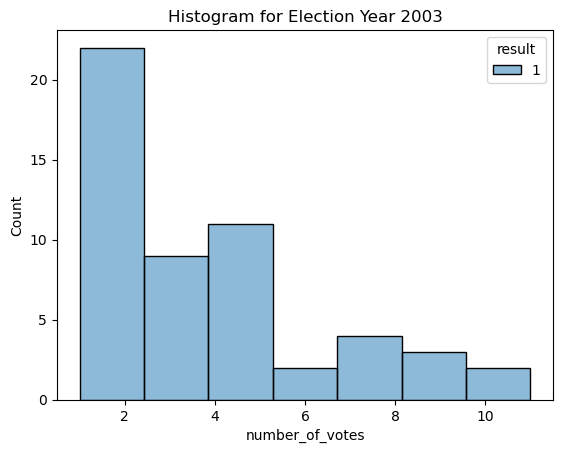

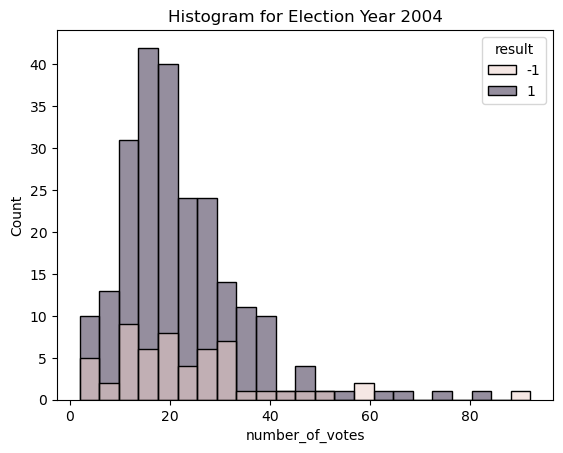

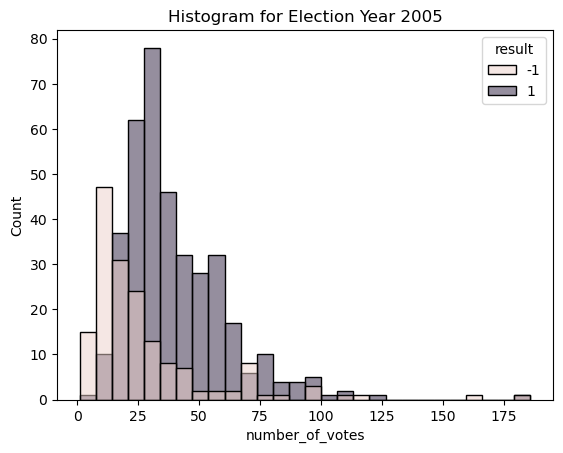

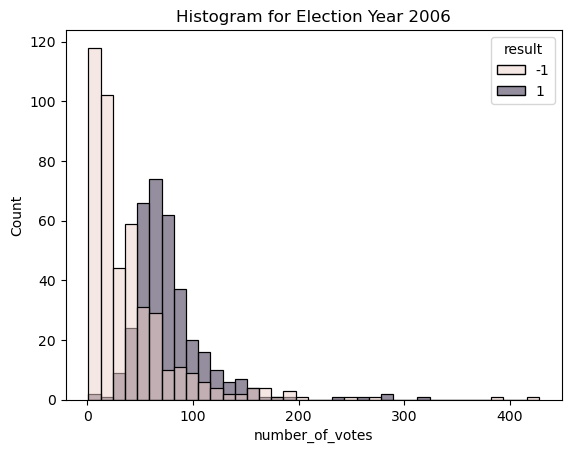

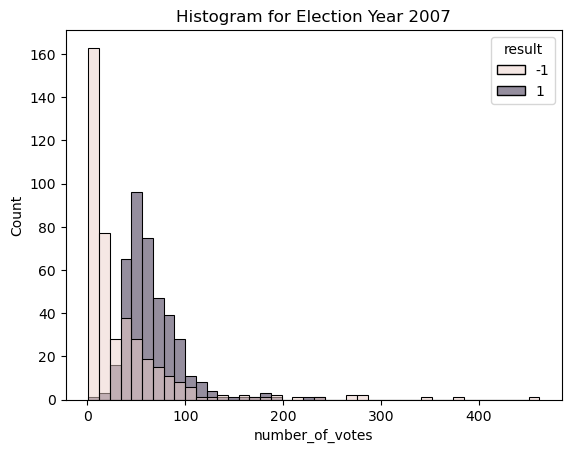

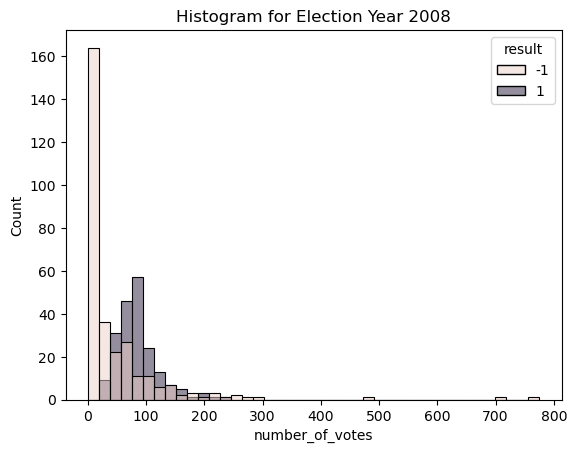

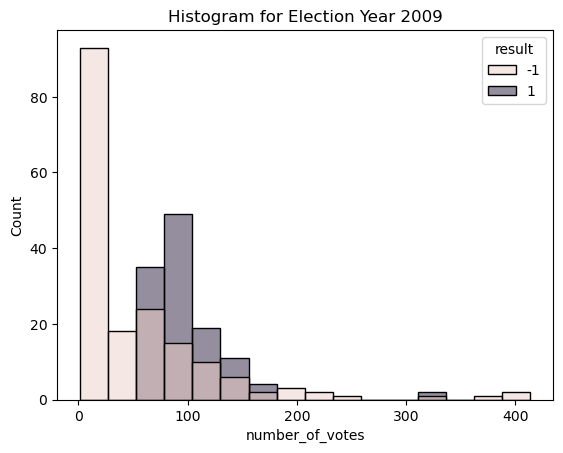

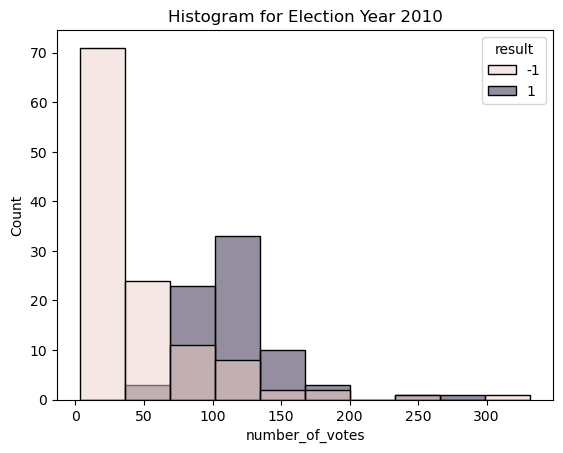

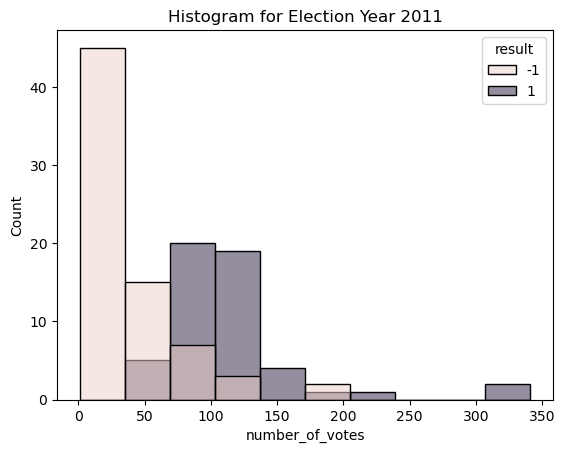

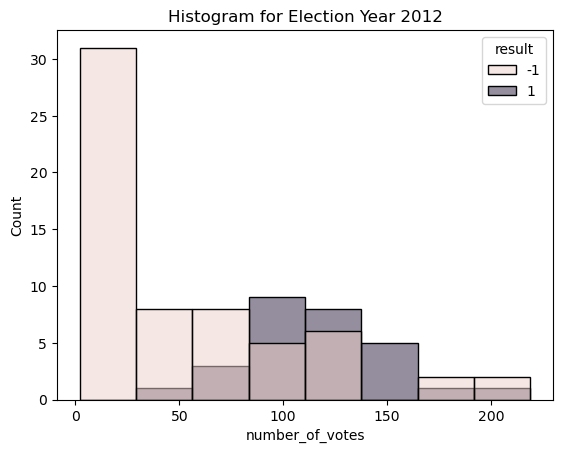

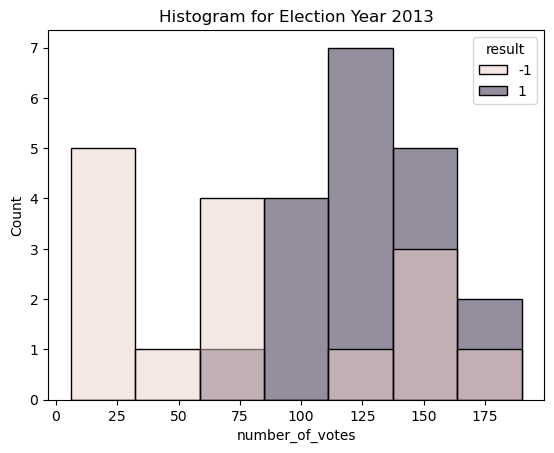

In [35]:
# Assuming 'election_year' is of type int
for year in sorted(multiple_elections['election_year'].unique()):
    data_subset = multiple_elections[multiple_elections['election_year'] == year]
    
    sns.histplot(x='number_of_votes', data=data_subset, hue='result', log_scale=(False, False))
    plt.title(f'Histogram for Election Year {int(year)}')
    plt.show()

<Axes: xlabel='number_of_votes', ylabel='Count'>

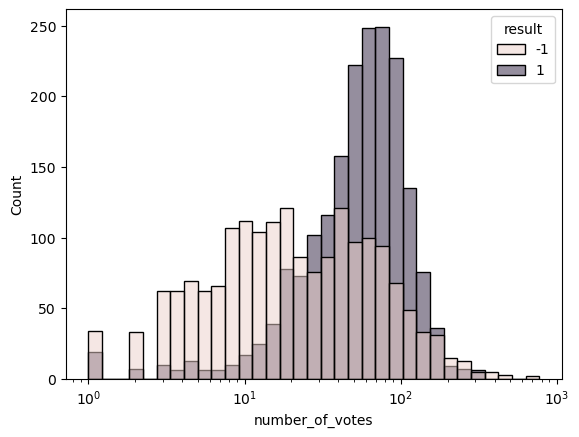

In [36]:
sns.histplot(x = 'number_of_votes', data = multiple_elections , hue = 'result', log_scale= (True, False))

In [37]:
new_df.groupby(["target", "result"])["source"].count().median()

41.0

In [38]:
new_df.groupby(["target", "result"])["source"].count().mean()

52.75395760665415